In [10]:
import os

fabric_refresh_token = None
%store -r fabric_refresh_token

if fabric_refresh_token is None:
    fabric_refresh_token = os.environ['CILOGON_REFRESH_TOKEN']
    %store fabric_refresh_token
    
print("Refresh token is: {}".format(fabric_refresh_token))

Refresh token is: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTIYJQHAYGIZBUMNTDKOBTGNQTINJTMFRDEMZSHAZWKMRTMU3WKZB7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMRTGQZTCNJQGUZDMMRGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ


#### Slice manager

In [11]:
import json
from fabrictestbed.slice_manager import SliceManager, Status

credentialmanager_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']

print(f"CM Host: {credentialmanager_host} Orchestrator Host: {orchestrator_host}")

slice_man = SliceManager(oc_host = orchestrator_host, cm_host = credentialmanager_host, refresh_token = fabric_refresh_token, project_name='all', scope='all')

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read().strip()

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


#### ID token

In [63]:
try:
    id_token, refresh_token = slice_man.refresh_tokens()
except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))

fabric_refresh_token=slice_man.get_refresh_token()
fabric_id_token=slice_man.get_id_token()
print()
print("New Refresh Token: {}".format(fabric_refresh_token))
print()
print("New Id Token: {}".format(fabric_id_token))
print()
print("Stored new Refresh Token")
%store fabric_refresh_token
print()
print("Stroed new ID Token")
%store fabric_id_token
print()


New Refresh Token: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTGNDEGYZGENDEMFTGKZDDMVRTMOBVGYYDOOJTGRRDKNJWGVSTQYR7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMRTGQZTIMZZGYZTOOBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ

New Id Token: eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6ImI0MTUxNjcyMTExOTFlMmUwNWIyMmI1NGIxZDNiNzY2N2U3NjRhNzQ3NzIyMTg1ZTcyMmU1MmUxNDZmZTQzYWEifQ.eyJlbWFpbCI6Im5hbm5rYXRAYnUuZWR1IiwiY2VydF9zdWJqZWN0X2RuIjoiL0RDPW9yZy9EQz1jaWxvZ29uL0M9VVMvTz1Cb3N0b24gVW5pdmVyc2l0eS9DTj1OYW5uYSBLYXRyaW4gSGFubmVzZG90dGlyIEE0NjA5NjM1NiIsImlkcCI6Imh0dHBzOi8vc2hpYi5idS5lZHUvaWRwL3NoaWJib2xldGgiLCJpZHBfbmFtZSI6IkJvc3RvbiBVbml2ZXJzaXR5IiwiZXBwbiI6Im5hbm5rYXRAYnUuZWR1IiwiZXB0aWQiOiJodHRwczovL3NoaWIuYnUuZWR1L2lkcC9zaGliYm9sZXRoIWh0dHBzOi8vY2lsb2dvbi5vcmcvc2hpYmJvbGV0aCFwZW5PVjQzcXF5blR1Tjg5T2hqNVJqcnVQUTA9IiwiYWZmaWxpYXRpb24iOiJzdHVkZW50QGJ1LmVkdTttZW1iZXJAYnUuZWR1IiwibmFtZSI6Ik5hbm5hIEthdHJpbiBIYW5uZXNkb3R0aXIiLCJhY3IiOiJodHRwczovL3NoaWIuYnUuZWR1L3NpbmdsZSIsImVudGl0bGVtZW50IjoiaHR0cDovL2lhb

#### Get available resources


Available resources:

Status: Status.OK

Topology: UKY: { cpu: 6/6 , core: 89/96 , ram: 1,462/1,536 G, disk: 109,090/109,600 G, unit: 3/3 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 12/12 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 3/4 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
Links:

Topology map: 


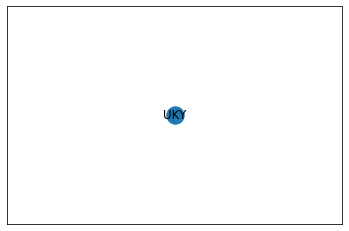

In [80]:
status, topology = slice_man.resources()
print()
print("Available resources:")
print()
print("Status: {}\n".format(status))
print("Topology: {}".format(topology))

print()
print("Topology map: ")
topology.draw()

In [65]:
help(SliceManager)

Help on class SliceManager in module fabrictestbed.slice_manager.slice_manager:

class SliceManager(builtins.object)
 |  SliceManager(*, cm_host: str, oc_host: str, refresh_token: str, project_name: str = 'all', scope: str = 'all')
 |  
 |  Implements User facing Control Framework API interface
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *, cm_host: str, oc_host: str, refresh_token: str, project_name: str = 'all', scope: str = 'all')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  create(self, *, slice_name: str, ssh_key: str, topology: fim.user.topology.ExperimentTopology = None, slice_graph: str = None, lease_end_time: str = None) -> Tuple[fabric_cf.orchestrator.orchestrator_proxy.Status, Union[Exception, List[fabric_cf.orchestrator.elements.reservation.Reservation]]]
 |      Create a slice
 |      @param slice_name slice name
 |      @param ssh_key SSH Key
 |      @param topology Experiment topology
 |      @param slice_graph Slice Graph st

#### Build slice

In [82]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, LinkType, Layer

experiment = ExperimentTopology()
slice_name = "NannaSlice2"

In [14]:
help(ExperimentTopology)

Help on class ExperimentTopology in module fim.user.topology:

class ExperimentTopology(Topology)
 |  ExperimentTopology(graph_file: str = None, graph_string: str = None, logger=None)
 |  
 |  Define an user topology model, inheriting behavior from Topology class.
 |  In addition to publicly visible methods the following calls can be made:
 |  topology.nodes - a read-only dictionary of nodes in the topology
 |  topology.links - a read-only dictionary of links in the topology
 |  topology.interface_list - a read-only list of all interfaces of all nodes
 |  If you want to operate on top of a Neo4j graph, use the cast() method.
 |  
 |  Method resolution order:
 |      ExperimentTopology
 |      Topology
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, graph_file: str = None, graph_string: str = None, logger=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cast(self, *, asm_graph: fim.graph.slices.abc_asm.A

#### Add node1

In [85]:
node1 = experiment.add_node(name='node2', site = 'UKY')

node1_capacities = Capacities()
node1_capacities.set_fields(core = 7, ram = 11, disk = 10)
node1.set_properties(capacities = node1_capacities, image_type='qcow2', image_ref='default_ubuntu_20')

#node1_nvme = node1.add_component(ctype=ComponentType.NVME, model='P4510', name='n1_nvme')
#node1_gpu  = node1.add_component(ctype=ComponentType.GPU, model='RTX6000', name='n1_gpu')
#node1_nic = node1.add_component(ctype=ComponentType.SharedNIC, model='ConnectX-6', name='n1_nic')

#### Draw current nodes:

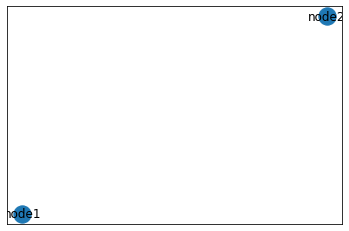

In [86]:
experiment.draw()

<a id='create_node'></a>
#### Create actual slice and request slice reservation:

In [87]:
#serialize into slice graph object
slice_graph = experiment.serialize()

#communicate with orchestrator for slice
status,reservations = slice_man.create(slice_name = slice_name, slice_graph = slice_graph, ssh_key = ssh_key)

#get the slice id of the newly created slice and check status to see if it went through
print("Request {}".format(status))
print("Reservations: {}".format(reservations))

slice_id = reservations[0].slice_id

#get only slice from id and status
#request, state = slice_man.slice_status(slice_id)
#print("Slice status request {}".format(request))
#print("Slice status {}".format(state))

Request Status.OK
Reservations: [{
    "graph_node_id": "171f1695-0c39-45d9-87b5-18bd7d70b0b5",
    "join_state": "None_",
    "lease_end": "2021-06-12 18:24:45",
    "reservation_id": "e546aed7-4235-4684-a265-5bab5ea9c784",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "96c24206-0b03-4ef8-9414-58bf9e09572f"
}, {
    "graph_node_id": "30f66362-3846-4316-ad47-8d3114f2ac9a",
    "join_state": "None_",
    "lease_end": "2021-06-12 18:24:45",
    "reservation_id": "99b4fdc5-c1c7-4e61-9d5e-dce8700fdfdf",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "96c24206-0b03-4ef8-9414-58bf9e09572f"
}]


#### Query slices:

In [ ]:
status, slices = slice_man.slices()

print("Response Status {}".format(status))
print("Slices {}".format(slices))

In [ ]:
#id_slice1 = slices[0].slice_id
#id_slice2 = slices[1].slice_id
#id_slice3 = slices[2].slice_id

#print("ID of slice 1: {}".format(id_slice1))
#print("ID of slice 2: {}".format(id_slice2))
#print("ID of slice 3: {}".format(id_slice3))

#### Get slice status:

In [72]:
import time

state = None
while state != 'StableOK':
    status, slice_status = slice_man.slice_status(slice_id=slice_id)
    state = slice_status.slice_state
    print("Response Status {}".format(status))
    print("Slice State: {}".format(slices[0].slice_state))
    time.sleep(20)

#final status
print("Response Status {}".format(status))
print("Slice Status {}".format(slice_status))  

Response Status Status.OK
Slice State: Configuring
Response Status Status.OK
Slice Status {
    "graph_id": "1bff3f09-940a-411f-b8ff-f041c62b05a6",
    "slice_id": "78733015-7cf8-4d1c-86df-89d036d48c03",
    "slice_name": "NannaSlice",
    "slice_state": "StableOK"
}


#### Query slivers:

In [ ]:
status, slivers = slice_man.slivers(slice_id=slice_id)

print("Response Status {}".format(status))
print("Slivers {}".format(reservations))

#### Sliver - capacities info:

In [79]:
for sliver in slivers:
    print("Requested capacities: {}".format(sliver.capacities))
    print("Allocated capacities: {}".format(sliver.allocated_capacities))
    print(sliver.capacity_hints)

Requested capacities: { core: 3 , ram: 10 G, disk: 10 G}
Allocated capacities: { core: 4 , ram: 16 G, disk: 10 G}
{ instance_type: fabric.c4.m16.d10}


#### Delete slice:

In [62]:
status, result = slice_man.delete(slice_id = id_slice1)

print("Response Status {}".format(status))
print("Response received {}".format(result))

status, result = slice_man.delete(slice_id = id_slice2)

print("Response Status {}".format(status))
print("Response received {}".format(result))

#status, result = slice_man.delete(slice_id = id_slice3)
#print("Response Status {}".format(status))
#print("Response received {}".format(result))

Response Status Status.OK
Response received None
Response Status Status.OK
Response received None
